In [ ]:
# referências:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
# https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/
# https://www.kaggle.com/code/ishanharshvardhan/time-series-analysis-and-forecasting-using-arima

In [1]:
import numpy as np
import netCDF4 as nc
import xarray as xr
import numpy as np
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import matplotlib.pyplot as plt
import pandas as pd
from dtw import *
from tqdm import tqdm

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
fp = '../data/sst.mnmean.nc'
ds = nc.Dataset(fp)

In [3]:
ds = xr.open_dataset(fp)
df = ds.to_dataframe()

In [4]:
df = df.reset_index()
df = df[df['nbnds'] == 0] # Garante que há apenas uma medição por área por tempo
df = df.drop('nbnds', axis='columns')
df = df.drop('time_bnds', axis='columns')

In [31]:
print(df['lat'].unique())
print(df['lon'].unique())

[ 88.  86.  84.  82.  80.  78.  76.  74.  72.  70.  68.  66.  64.  62.
  60.  58.  56.  54.  52.  50.  48.  46.  44.  42.  40.  38.  36.  34.
  32.  30.  28.  26.  24.  22.  20.  18.  16.  14.  12.  10.   8.   6.
   4.   2.   0.  -2.  -4.  -6.  -8. -10. -12. -14. -16. -18. -20. -22.
 -24. -26. -28. -30. -32. -34. -36. -38. -40. -42. -44. -46. -48. -50.
 -52. -54. -56. -58. -60. -62. -64. -66. -68. -70. -72. -74. -76. -78.
 -80. -82. -84. -86. -88.]
[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100. 102. 104. 106. 108. 110.
 112. 114. 116. 118. 120. 122. 124. 126. 128. 130. 132. 134. 136. 138.
 140. 142. 144. 146. 148. 150. 152. 154. 156. 158. 160. 162. 164. 166.
 168. 170. 172. 174. 176. 178. 180. 182. 184. 186. 188. 190. 192. 194.
 196. 198. 200. 202. 204. 206. 208. 210. 212. 214.

In [5]:
df.head()

,lat,lon,time,sst
0,88.0,0.0,1854-01-01,-1.8
2,88.0,0.0,1854-02-01,-1.8
4,88.0,0.0,1854-03-01,-1.8
6,88.0,0.0,1854-04-01,-1.8
8,88.0,0.0,1854-05-01,-1.8


In [24]:
#from pandas import read_csv
#from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from math import sqrt

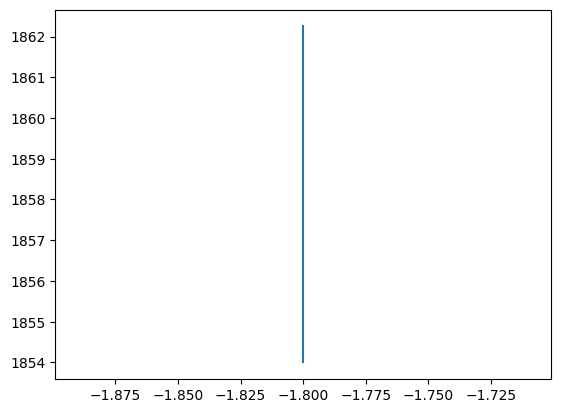

In [7]:
plt.plot(df['sst'][:100],df['time'][:100])
plt.show()

In [8]:
series = df.values

In [34]:
series2 = []
for serie in series:
    if serie[0] == 32.0 and serie[1] == 16.0:   
        series2.append(round(serie[3],1))

In [35]:
print(len(series2))
print(series2[0:10])

2038
[17.3, 16.7, 16.5, 17.4, 19.2, 22.3, 25.2, 26.8, 24.4, 22.5]


In [37]:
print(len(train),len(history))
history[0]

1426 1426


17.3

In [38]:
# split into train and test sets
#X = [x for x in series]
X = series2
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
#history = [x for x in train]]
history = train
predictions = list()
#print(len(X))
#print(len(train))
#print(len(test))
#print(len(history))

# walk-forward validation
predictions = []
for t in range(len(test)):
    model = sm.tsa.statespace.SARIMAX(history,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    if t % 100 == 0:
        print('predicted=%f, expected=%f' % (yhat, obs))

#print(predictions)
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
#plt.plot(test)
#plt.plot(predictions, color='red')
#plt.show()

predicted=21.247842, expected=21.300000
predicted=15.678338, expected=15.900000
predicted=24.570608, expected=25.300000
predicted=21.830258, expected=21.500000
predicted=16.386318, expected=16.400000


C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26.134215, expected=25.900000


C:\ProgramData\Anaconda\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=22.804551, expected=23.400000
Test RMSE: 0.389


In [39]:
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4910      0.013     36.449      0.000       0.465       0.517
ma.L1         -0.9789      0.006   -167.115      0.000      -0.990      -0.967
ma.S.L12      -0.9684      0.009   -109.829      0.000      -0.986      -0.951
sigma2         0.2740      0.004     64.930      0.000       0.266       0.282


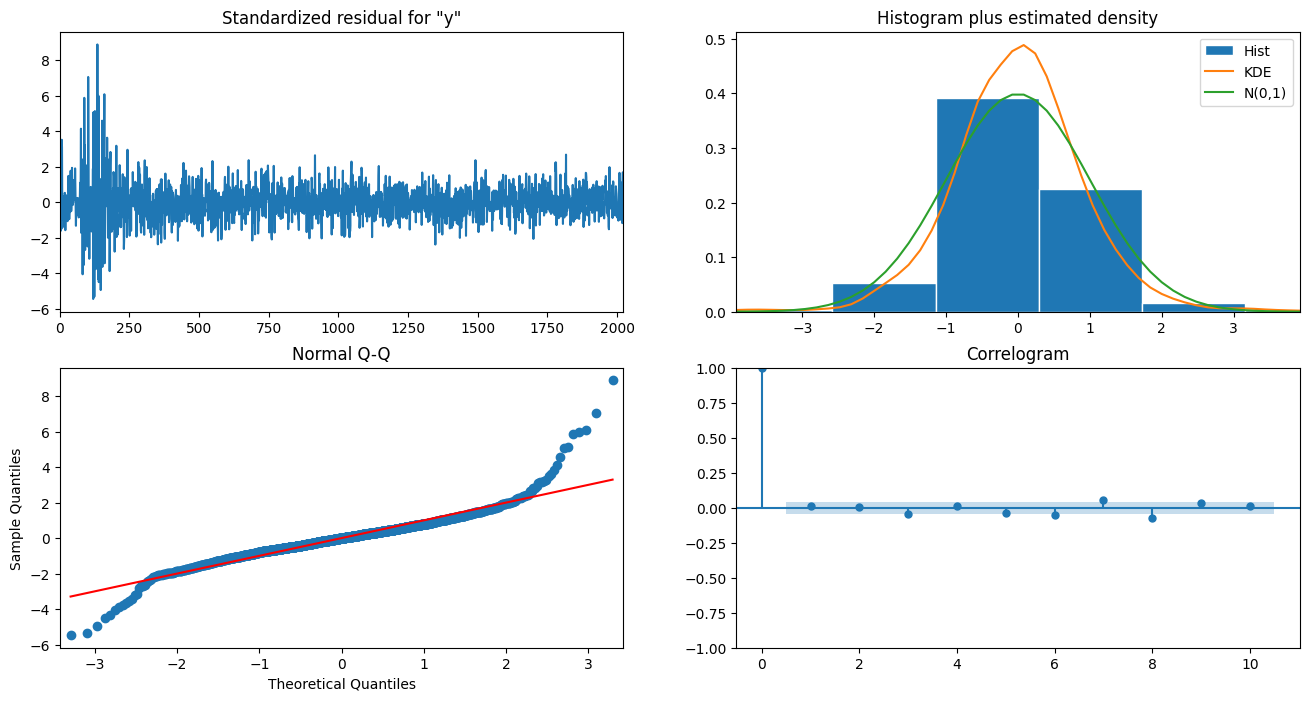

In [40]:
model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()